## IMPORT LIBRARIES

In [1]:
#importing all required libraries
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import seaborn as sbn 
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

## LOAD AND IMPORT DATA

In [3]:
#importing the boston house price prediction dataset from sklearn
from sklearn.datasets import load_boston
#instantiating
boston = load_boston()

#### ABOUT THE DATA

In [4]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
#extracting the data and initialising to a dataframe
data = pd.DataFrame(boston.data)

In [6]:
data.columns = boston.feature_names
data.head() 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


## DATA EXPLORATION

In [7]:
#including target, PRICE in the data
data["PRICE"] = boston.target

In [8]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [9]:
#shape of dataframe
data.shape

(506, 14)

In [10]:
#the columns ( features + target) in the data
data.columns 

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

In [11]:
#datatypes of different features
data.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
PRICE      float64
dtype: object

In [12]:
#explore the distinct values in columns
data.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
PRICE      229
dtype: int64

In [13]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### MISSING VALUES IN DATA

The concept of missing values is important to understand in order to successfully manage data.  If the missing values are not handled properly by the researcher, then he/she may end up drawing an inaccurate inference about the data.  Due to improper handling, the result obtained by the researcher will differ from ones where the missing values are present.

In [14]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

We see that there no missing data in the above dataset
This can be confirmed by printing rows in which data is null as shown below

In [15]:
data[data.isnull().any(axis=1)]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE


This confirms that there are no rows with null values in the boston data set

### DATA CORRELATION

Inorder to find the pairwise correlation of all columns in the dataframe, we will be using pandas.DataFrame.corr() method

In [16]:
corr = data.corr()

In [17]:
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


Using seaborn , we can visualize the correlation better, in the form of a heatmap

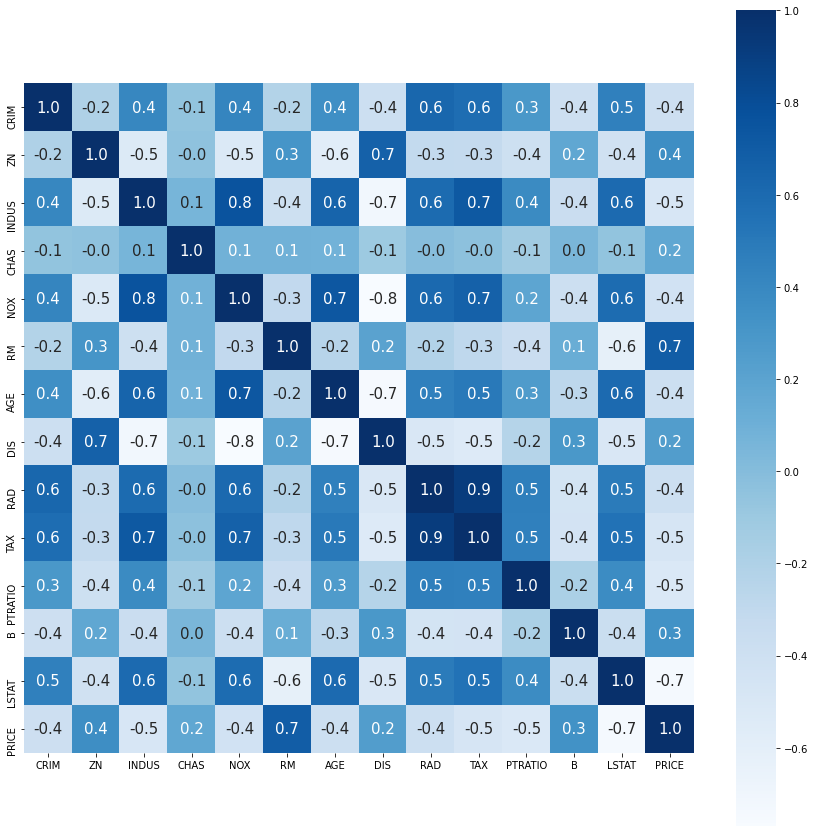

In [18]:
plt.figure(figsize = (15,15))
sbn.heatmap(corr, cbar = True, square = True , fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Blues')
plt.show()

### TRAINING DATA AS FEATURES AND TARGET

In [19]:
# features
X = data.drop(["PRICE"],axis = 1)

In [20]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [21]:
#target 
y = data["PRICE"]

In [22]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: PRICE, dtype: float64

### SPLITING DATA 
Now we will be spliting the data into training set and test set

In [23]:
X_training , X_test , y_training , y_test = train_test_split(X,y, test_size = 0.3 , random_state = 3)

# MODEL

#### LOADING THE MODEL

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
# instanziating 
boston_model_lr = LinearRegression()

#### TRAINING THE MODEL

In [26]:
#fitting the model with the training data
boston_model_lr.fit(X_training,y_training)

LinearRegression()

In [27]:
# Identifying the coefficients
coef = pd.DataFrame([X_training.columns,boston_model_lr.coef_]).T
coef.columns = ['Features','Coefficient']

In [28]:
coef

,Features,Coefficient
0,CRIM,-0.128899
1,ZN,0.046254
2,INDUS,-0.054197
3,CHAS,3.832088
4,NOX,-12.4515
5,RM,3.727904
6,AGE,0.007378
7,DIS,-1.195518
8,RAD,0.280152
9,TAX,-0.007754


#### MODEL EVALUATION

In [29]:
prediction  = boston_model_lr.predict(X_training)

In [30]:
#comparing prediction and actual price of training data using mse
print('MSE:',mean_squared_error(y_training,prediction))
print('RMSE:',np.sqrt(mean_squared_error(y_training,prediction)))

MSE: 22.419716470044353
RMSE: 4.734946300650552


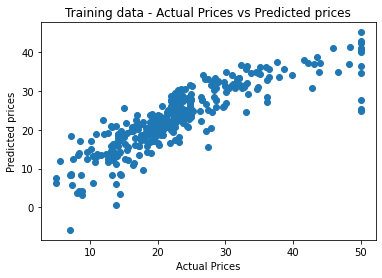

In [31]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_training, prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted prices")
plt.title("Training data - Actual Prices vs Predicted prices")
plt.show()

##### We see that the actual prices and predicted prices on the training set follow almost a linear trend

#### MODEL EVALUATION WITH TEST DATA

In [32]:
test_prediction  = boston_model_lr.predict(X_test)

In [33]:
#comparing prediction and actual price of training data using mse
print('MSE:',mean_squared_error(y_test,test_prediction))
print('RMSE:',np.sqrt(mean_squared_error(y_test,test_prediction)))

MSE: 22.43193607073753
RMSE: 4.736236488050141


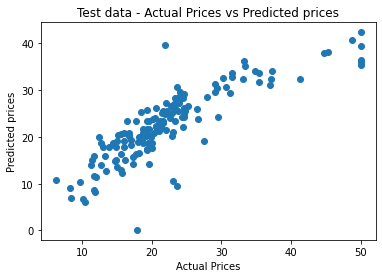

In [34]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_test, test_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted prices")
plt.title("Test data - Actual Prices vs Predicted prices")
plt.show()

##### We see that the actual prices and predicted prices on the training set follow almost a linear trend. Also the rmse values are similar , hence the model does not overfit